In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
datafile = 'ex2data1.txt'
cols = np.loadtxt(datafile, delimiter=',',usecols=(0,1,2), unpack=True)

In [3]:
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X, 0, 1, axis=1)

In [4]:
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

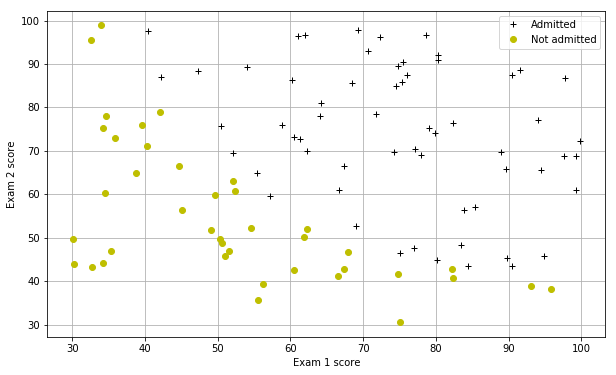

In [5]:

def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,1],pos[:,2],'k+',label='Admitted')
    plt.plot(neg[:,1],neg[:,2],'yo',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
plotData()

In [ ]:
# print y

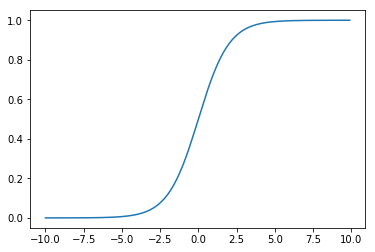

In [122]:
z = np.arange(-10,10,0.1)
from scipy.special import expit
plt.plot(z, expit(z))
plt.gird = True

In [123]:
### Hypothesis Function and Cost Function for logistic regression ###

In [124]:
def h(theta, X):
    return expit(np.dot(X, theta))

def computeCost(theta, X, y, mylambda=0.):
    term1 = np.dot(-np.array(y).T,np.log(h(theta,X)))
    term2 = np.dot((1-np.array(y)).T, np.log(1-h(theta, X)))
    regterm = (mylambda/2) * np.sum(np.dot(theta[1:].T, theta[1:])) #starts from 1 and skips theta 0
    return float((1./m) * (np.sum(term1-term2) + regterm))

In [125]:
initial_theta = np.zeros((X.shape[1],1))

In [126]:
computeCost(initial_theta, X, y)

0.6931471805599452

In [127]:
from scipy import optimize
def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]

In [128]:
theta, mincost = optimizeTheta(initial_theta, X, y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [129]:
print computeCost(theta,X,y)

0.20349770159


In [130]:
def prediction(theta, X):
    return h(theta, X) >= 0.5
pos_correct = float(np.sum(prediction(initial_theta, pos)))
print pos_correct
neg_correct = float(np.sum(np.invert(prediction(initial_theta, neg))))
print neg_correct
tot = len(pos) + len(neg)
percent_correct = float(pos_correct+neg_correct)/tot
print "Fraction of training samples correctly predicted: {}".format(percent_correct)


60.0
0.0
Fraction of training samples correctly predicted: 0.6


In [131]:
### Visualizing the data ###

In [132]:
datafile = 'ex2data2.txt'
#!head $datafile
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
##Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
##Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

In [133]:
pos = np.array([X[i] for i in xrange(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in xrange(X.shape[0]) if y[i] == 0])

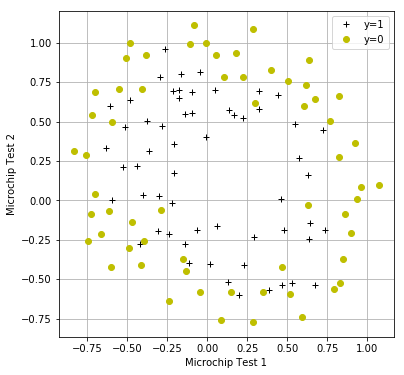

In [134]:
def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)

#Draw it square to emphasize circular features
plt.figure(figsize=(6,6))
plotData()

In [135]:
#This code I took from someone else (the OCTAVE equivalent was provided in the HW)
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )
    # print out
    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            print term1.shape
            term2 = x2col ** (j)
            print term1 * term2
            term  = (term1 * term2).reshape( term1.shape[0], 1 )
            print term
            out   = np.hstack(( out, term ))
    return out

In [136]:
mappedX = mapFeature(X[:,1],X[:,2])

(118,)
[ 0.051267  -0.092742  -0.21371   -0.375     -0.51325   -0.52477   -0.39804
 -0.30588    0.016705   0.13191    0.38537    0.52938    0.63882    0.73675
  0.54666    0.322      0.16647   -0.046659  -0.17339   -0.47869   -0.60541
 -0.62846   -0.59389   -0.42108   -0.11578    0.20104    0.46601    0.67339
 -0.13882   -0.29435   -0.26555   -0.16187   -0.17339   -0.28283   -0.36348
 -0.30012   -0.23675   -0.06394    0.062788   0.22984    0.2932     0.48329
  0.64459    0.46025    0.6273     0.57546    0.72523    0.22408    0.44297
  0.322      0.13767   -0.0063364 -0.092742  -0.20795   -0.20795   -0.43836
 -0.21947   -0.13882    0.18376    0.22408    0.29896    0.50634    0.61578
  0.60426    0.76555    0.92684    0.82316    0.96141    0.93836    0.86348
  0.89804    0.85196    0.82892    0.79435    0.59274    0.51786    0.46601
  0.35081    0.28744    0.085829   0.14919   -0.13306   -0.40956   -0.39228
 -0.74366   -0.69758   -0.75518   -0.69758   -0.4038    -0.38076   -0.50749
 -0.5

In [137]:
from scipy import optimize
def optimizeRegularizedTheta(theta, X, y, mylambda=0.):
    result = optimize.minimize(computeCost, theta, args=(X, y, mylambda), method='BFGS', options={'maxiter': 500, 'disp': False})
    return np.array([result.x]), result.fun
theta, mincost = optimizeRegularizedTheta(initial_theta, X, y)

In [138]:
print theta
print mincost

[[-0.01418227 -0.30352661 -0.01815368]]
0.690241122034


In [139]:
def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]

In [140]:
theta, mincost = optimizeTheta(initial_theta, X, y)

Optimization terminated successfully.
         Current function value: 0.690241
         Iterations: 104
         Function evaluations: 186


In [141]:
print theta
print mincost

[-0.01419826 -0.30349361 -0.01815655]
0.690241122103
